Problem 1: Use the Wine dataset for this problem 1 .
1. Calculate and visualize the correlation matrix of the features of the dataset as a color map and save it
as “1.1.png”.
[5 points]
2. Standardize the individual features of the data by subtracting the mean and scaling to unit variance.
Then apply PCA to reduce the dimensions of the data. Reducing the number of dimensions leads to a
loss of information, which is quantified in terms of the explained variance ratio. Plot a graph of the
explained variance ratio vs the number of principal components and save it as “1.2.png”. (This can
be used to determine how many dimensions a high dimensional data set should be reduced to.)
[10 points]
3. Consider only the first 2 principal components to obtain two dimensional vectors. Plot these vectors
on a two dimensional plot and save it as “1.3.png”. The points in the plot should be colored based on
the ground truth labels. Have a legend specifying which color corresponds to which class.

4. Apply the k-means clustering algorithm on these 2d vectors to divide them into 3 clusters. Plot these
points as before, but colored based on the cluster assignments, and save it as “1.4.png”. Can you
quantify the quality of the clustering with respect to the ground truth labels?

In [0]:
from google.colab import drive

drive.mount('/content/gdrive' ,force_remount=True)

Mounted at /content/gdrive


In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
wine_data=pd.read_csv('/content/gdrive/My Drive/datasets/lab_as3/wine.data',header=None)
wine_data.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [0]:
wine_features=wine_data.values[:,1:]
wine_labels=wine_data.values[:,0]
wine_labels

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 3., 3., 3., 3., 3., 3.,
       3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
       3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
       3., 3., 3., 3., 3., 3., 3., 3.])

Calculate and visualize the correlation matrix of the features of the dataset as a color map and save it
as “1.1.png”




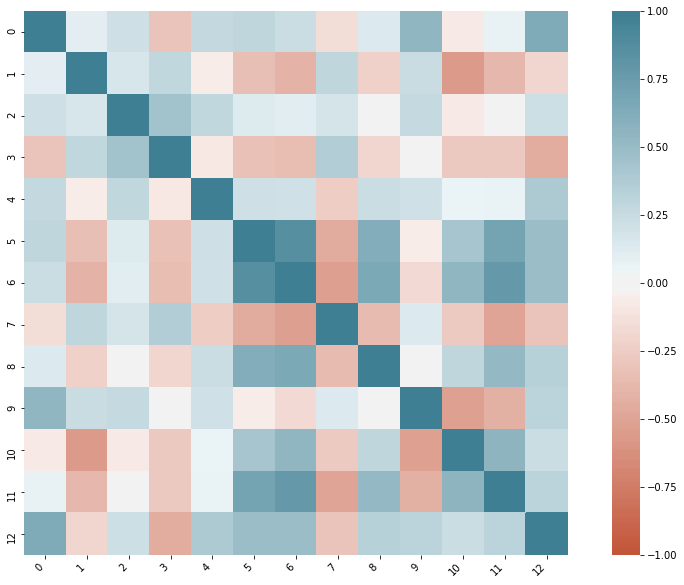

In [0]:
wine_features_df=pd.DataFrame(wine_features)

corr=wine_features_df.corr()
plt.figure(figsize=(16,10))
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

Standardize the individual features of the data by subtracting the mean and scaling to unit variance.
Then apply PCA to reduce the dimensions of the data. Reducing the number of dimensions leads to a
loss of information, which is quantified in terms of the explained variance ratio. Plot a graph of the
explained variance ratio vs the number of principal components and save it as “1.2.png”. (This can
be used to determine how many dimensions a high dimensional data set should be reduced to.)

In [0]:

#scaling to 0 mean and unit variance

from sklearn.preprocessing import scale

wine_scaled=scale(wine_features)

wine_scaled.mean(axis=0),wine_scaled.std(axis=0)

(array([-8.38280756e-16, -1.19754394e-16, -8.37033314e-16, -3.99181312e-17,
        -3.99181312e-17,  0.00000000e+00, -3.99181312e-16,  3.59263181e-16,
        -1.19754394e-16,  3.49283648e-17,  1.99590656e-16,  3.19345050e-16,
        -1.59672525e-16]),
 array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]))

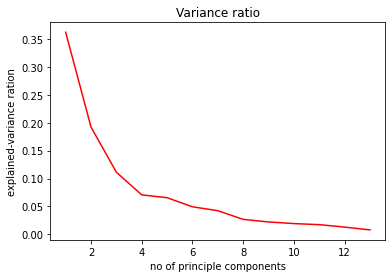

In [0]:
from sklearn.decomposition import PCA as pca


wine_pca=pca().fit(wine_scaled)
wine_var_ratio=wine_pca.explained_variance_ratio_


component_no=[i+1 for i in range(len(wine_scaled[0])) ]


plt.plot(component_no,wine_var_ratio,color='r')
plt.xlabel('no of principle components')
plt.ylabel('explained-variance ration')
plt.title('Variance ratio')
plt.show()



Consider only the first 2 principal components to obtain two dimensional vectors. Plot these vectors
on a two dimensional plot and save it as “1.3.png”. The points in the plot should be colored based on
the ground truth labels. Have a legend specifying which color corresponds to which class.

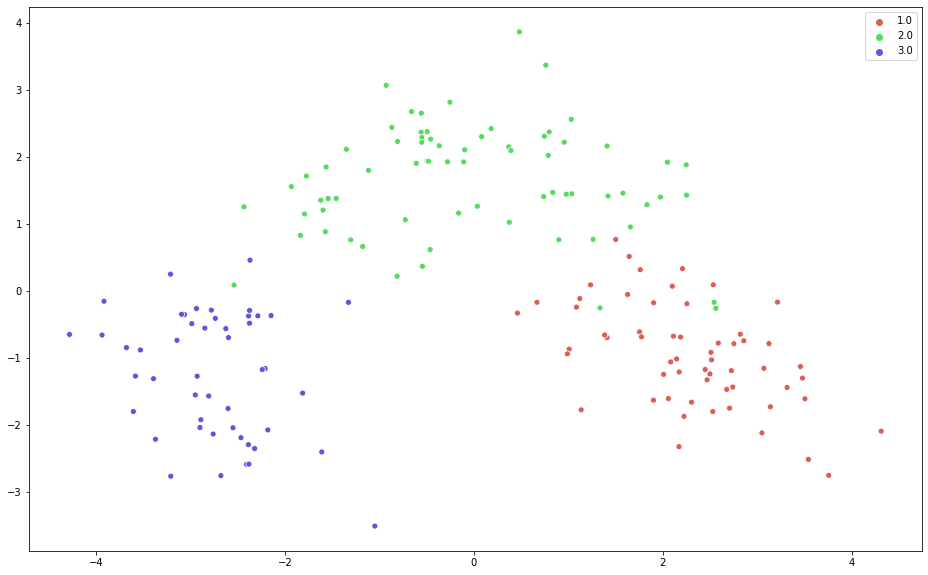

In [0]:
wine_pca_two=pca(n_components=2).fit_transform(wine_scaled)


plt.figure(figsize=(16,10))
sns.scatterplot(
    x=wine_pca_two[:,0], y=wine_pca_two[:,1],
    hue=wine_labels,
    palette=sns.color_palette("hls", 3),
    legend="full",
    alpha=1
)

Apply the k-means clustering algorithm on these 2d vectors to divide them into 3 clusters. Plot these
points as before, but colored based on the cluster assignments, and save it as “1.4.png”. Can you
quantify the quality of the clustering with respect to the ground truth labels?

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1], dtype=int32)

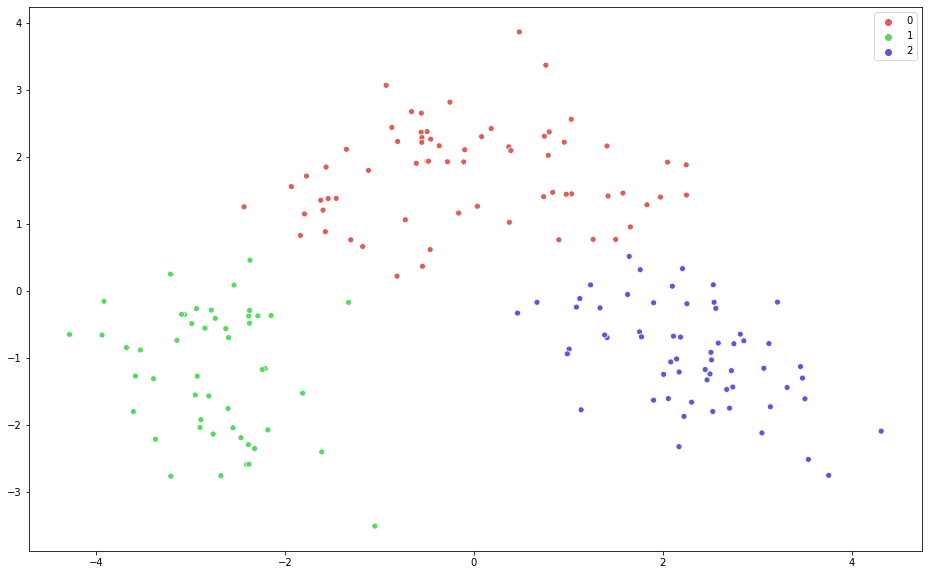

In [0]:
from sklearn.cluster import KMeans



kmeans_labels=KMeans(n_clusters=3).fit_predict(wine_pca_two)



plt.figure(figsize=(16,10))
sns.scatterplot(
    x=wine_pca_two[:,0], y=wine_pca_two[:,1],
    hue=kmeans_labels,
    palette=sns.color_palette("hls", 3),
    legend="full",
    alpha=1
)
kmeans_labels

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3], dtype=int32)

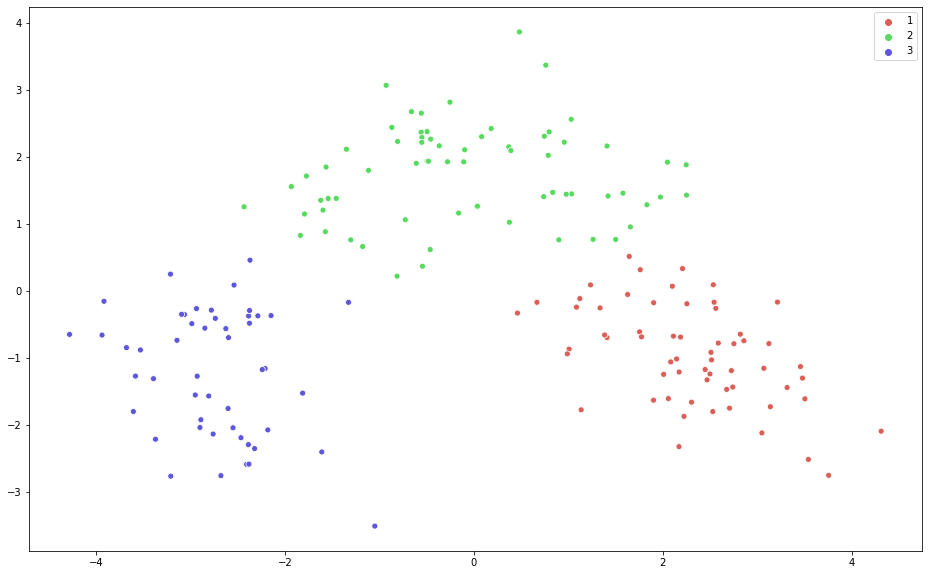

In [0]:
#making the cluster labels consistent for comparing 


#0->2 ,1->3,2->1


for i in range(len(kmeans_labels)):
  if kmeans_labels[i]==0:
    kmeans_labels[i]=2
  elif kmeans_labels[i]==1:
    kmeans_labels[i]=3
  elif kmeans_labels[i]==2:
    kmeans_labels[i]=1
plt.figure(figsize=(16,10))
sns.scatterplot(
    x=wine_pca_two[:,0], y=wine_pca_two[:,1],
    hue=kmeans_labels,
    palette=sns.color_palette("hls", 3),
    legend="full",
    alpha=1
)
kmeans_labels


In [0]:
#calculating mse ,accuracy_score_f1_score,homogenity_score


from sklearn.metrics import accuracy_score as ac,f1_score,mean_squared_error as mse,homogeneity_score as hs

print('accuracy',ac(wine_labels,kmeans_labels))
print("f1_score",f1_score(wine_labels,kmeans_labels,average='micro'))
print('mse',mse(wine_labels,kmeans_labels))
print('homogenity',hs(wine_labels,kmeans_labels))

accuracy 0.9719101123595506
f1_score 0.9719101123595506
mse 0.028089887640449437
homogenity 0.8859092326545046


The Silhouette Coefficient is calculated using the mean intra-cluster distance (a) and the mean nearest-cluster distance (b) for each sample. The Silhouette Coefficient for a sample is (b - a) / max(a, b). To clarify, b is the distance between a sample and the nearest cluster that the sample is not a part of. Note that Silhouette Coefficient is only defined if number of labels is 2 <= n_labels <= n_samples - 1.

In [0]:
from sklearn.metrics import silhouette_score as ss


print('silhoutte',ss(wine_pca_two,kmeans_labels))

silhoutte 0.5615238075263914
